#### About the dataset

* This is a public dataset provided by WHO about Covid 19
* The dataset is from 3 January 2020 to 24 November 2022.
* The link: https://covid19.who.int/WHO-COVID-19-global-data.csv

#### Aim
* The aim of this project is to perform data exploration of the WHO Covid 19 global dataset to gain better understanding about the crisis

#### Ways to explore the data
* Using statistical power
* Using data visualizations



#### Things to be measured are:

* Seeing if any other columns influences the other e.g. new cases causing new deaths.
* Comparison of New deaths and New cases over the years.
* Comparison of cumulative deaths and cumulative cases over the years.
* Seeing which country had alot of New cases in the year 2020, 2021 and 2022.
* Seeing which country had alot of New deaths in the year 2020, 2021 and 2022.
* Seeing which region had alot of New cases in the years 2020,2021 and 2022 all together.

In [2]:
# importing libraies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# importing the CSV dataset into the notebook
df = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')

In [3]:
# Viewing random sample data of about 10 records

df.sample(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
222478,2021-05-25,TH,Thailand,SEARO,3226,135439,26,832
153155,2022-08-07,NR,Nauru,WPRO,0,4409,0,1
57303,2020-08-15,KP,Democratic People's Republic of Korea,SEARO,0,0,0,0
120192,2022-01-23,KG,Kyrgyzstan,EURO,787,195394,3,2849
36019,2020-03-24,CV,Cabo Verde,AFRO,0,3,0,0
120364,2022-07-14,KG,Kyrgyzstan,EURO,47,201329,0,2991
210928,2021-08-10,SO,Somalia,EMRO,64,15939,8,858
28260,2022-02-19,BA,Bosnia and Herzegovina,EURO,616,367641,31,15263
47827,2020-09-21,CG,Congo,AFRO,3,5005,0,89
148773,2022-03-06,MA,Morocco,EMRO,80,1161586,6,16015


In [4]:
# Viewing the number of records and columns 
print('The dataset has', df.shape[0], 'records and ', df.shape[1], 'columns.')

The dataset has 250509 records and  8 columns.


In [5]:
print('The columns data types are as follows:')
df.dtypes

The columns data types are as follows:


Date_reported        object
Country_code         object
Country              object
WHO_region           object
New_cases             int64
Cumulative_cases      int64
New_deaths            int64
Cumulative_deaths     int64
dtype: object

In [6]:
print('Percentage number of null values in the columns is as follows:')
df.isnull().sum() / len(df) * 100

Percentage number of null values in the columns is as follows:


Date_reported        0.000000
Country_code         0.421941
Country              0.000000
WHO_region           0.000000
New_cases            0.000000
Cumulative_cases     0.000000
New_deaths           0.000000
Cumulative_deaths    0.000000
dtype: float64

* Only 'Country_code' has null values which is fine and is not that important to just drop them
        - It is still important to try to identify these missing data

In [7]:
print("Countries with null Country codes are:")
df[df['Country_code'].isnull()]['Country'].unique()

Countries with null Country codes are:


array(['Namibia'], dtype=object)

* It is shown that the country without a country code is 'Namibia' only
* The Country code for Namibia is 'NA'
* Time to replace the null values with 'NA'

In [8]:
df['Country_code'].fillna('NA', inplace=True)
# same as df['Country_code'].replace('np.nan', inplace=True)

In [9]:
# rechecking 
df[df['Country_code'].isnull()]['Country'].unique()

array([], dtype=object)

In [10]:
df[df['Country_code'] == 'NA'].head(3)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
151151,2020-01-03,NA,Namibia,AFRO,0,0,0,0
151152,2020-01-04,NA,Namibia,AFRO,0,0,0,0
151153,2020-01-05,NA,Namibia,AFRO,0,0,0,0


In [11]:
# Further understanding of the values in the rows, starting with the ones with object datatype
df.describe(exclude='number').T

,count,unique,top,freq
Date_reported,250509,1057,2020-01-03,237
Country_code,250509,237,AF,1057
Country,250509,237,Afghanistan,1057
WHO_region,250509,7,EURO,65534


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,250509.0,2539.188560,1.612633e+04,-8261.0,0.0,18.0,448.0,1265520.0
Cumulative_cases,250509.0,982122.918829,4.708952e+06,0.0,745.0,20303.0,266392.0,97030505.0
New_deaths,250509.0,26.365137,1.485429e+02,-2437.0,0.0,0.0,5.0,11447.0
Cumulative_deaths,250509.0,14792.799700,6.543740e+04,0.0,7.0,252.0,4120.0,1067123.0


* Columns 'New_cases' and 'New_deaths' have negative values and should be changed
* The Standard Deviation of all the columns is too big no wonder the quantiles have a huge gap

In [13]:
print('The minimum value of "New_cases" is',  df['New_cases'].min())
print('The minimum value of "New_deaths" is',  df['New_deaths'].min())

The minimum value of "New_cases" is -8261
The minimum value of "New_deaths" is -2437


* This will cause a problem with the calculations and should be fixed 

In [14]:
# Changing the negative numbers to positive
df['New_cases'] = abs(df['New_cases'])
df['New_deaths'] = abs(df['New_deaths'])

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,250509.0,2539.312691,1.612631e+04,0.0,0.0,18.0,449.0,1265520.0
Cumulative_cases,250509.0,982122.918829,4.708952e+06,0.0,745.0,20303.0,266392.0,97030505.0
New_deaths,250509.0,26.386613,1.485391e+02,0.0,0.0,0.0,5.0,11447.0
Cumulative_deaths,250509.0,14792.799700,6.543740e+04,0.0,7.0,252.0,4120.0,1067123.0


In [16]:
# Taking a look at 'New deaths' columns because of the quantiles even though it certainly has outliers and cannot be masked
df['New_deaths'].unique()

array([   0,    1,    2, ..., 3100, 2454, 2326], dtype=int64)

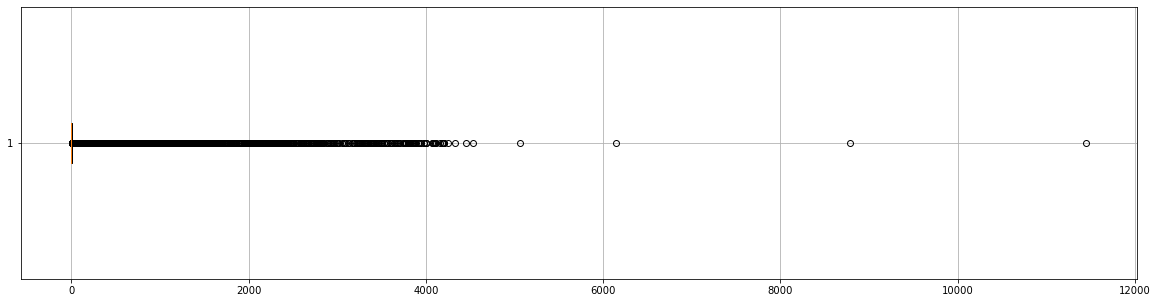

In [17]:
plt.figure(figsize=(20,5))
plt.boxplot(df['New_deaths'], vert=False)
plt.grid();

#### Normalization

In [18]:
# Looking at the values again
df.describe().T

,count,mean,std,min,25%,50%,75%,max
New_cases,250509.0,2539.312691,1.612631e+04,0.0,0.0,18.0,449.0,1265520.0
Cumulative_cases,250509.0,982122.918829,4.708952e+06,0.0,745.0,20303.0,266392.0,97030505.0
New_deaths,250509.0,26.386613,1.485391e+02,0.0,0.0,0.0,5.0,11447.0
Cumulative_deaths,250509.0,14792.799700,6.543740e+04,0.0,7.0,252.0,4120.0,1067123.0


* There is a huge gap difference between the maximum number and the minimum number of 'New cases'
* There is also a huge gap difference between the maximum number and the minimum number of 'New deaths'
* The values need to be normalized to be in the same range by dividing each value by it's maximum value

In [19]:
print('For "New cases" column, the minimum number is', df['New_cases'].min(), 'whilst the maximum number is', df['New_cases'].max() )

For "New cases" column, the minimum number is 0 whilst the maximum number is 1265520


In [20]:
print('For "New deaths" column, the minimum number is', df['New_deaths'].min(), 'whilst the maximum number is', df['New_deaths'].max() )

For "New deaths" column, the minimum number is 0 whilst the maximum number is 11447


In [21]:
df['cases'] = df['New_cases'] / df['New_cases'].max()
df['deaths'] = df['New_deaths'] / df['New_deaths'].max()
df['new_cumulative_cases'] = df['Cumulative_cases'] / df['Cumulative_cases'].max()
df['new_cumulative_deaths'] = df['Cumulative_deaths'] / df['Cumulative_deaths'].max()

In [22]:
df.drop(columns = ['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'], inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cases,250509.0,0.002007,0.012743,0.0,0.000000,0.000014,0.000355,1.0
deaths,250509.0,0.002305,0.012976,0.0,0.000000,0.000000,0.000437,1.0
new_cumulative_cases,250509.0,0.010122,0.048531,0.0,0.000008,0.000209,0.002745,1.0
new_cumulative_deaths,250509.0,0.013862,0.061321,0.0,0.000007,0.000236,0.003861,1.0


#### Seeing the relationships between the columns

In [23]:
# Seeing if there is any correlation between the columns

df.corr()

,cases,deaths,new_cumulative_cases,new_cumulative_deaths
cases,1.000000,0.555651,0.490788,0.443305
deaths,0.555651,1.000000,0.381474,0.479203
new_cumulative_cases,0.490788,0.381474,1.000000,0.891330
new_cumulative_deaths,0.443305,0.479203,0.891330,1.000000


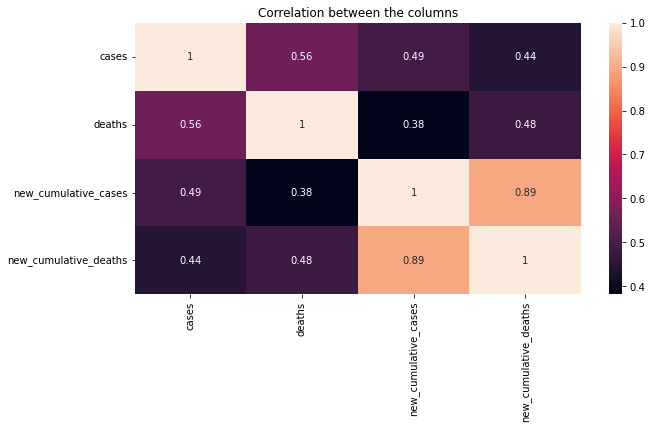

In [24]:
# Using a visual presentation
plt.figure(figsize=(10,5))
plt.title('Correlation between the columns')
sns.heatmap(df.corr(), annot=True);

* Judging from the results, there is a stronger relationship between New_cases and New_deaths
* There is also a stronger relationship between Cumulative_cases and Cumulative_deaths

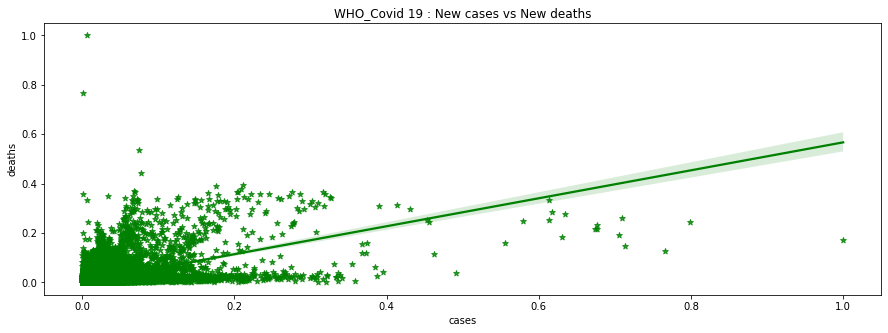

In [25]:
# New cases vs New deaths 
plt.figure(figsize=(15,5))
plt.title('WHO_Covid 19 : New cases vs New deaths')
sns.regplot(x = df['cases'], y=df['deaths'], color='green', marker = '*');

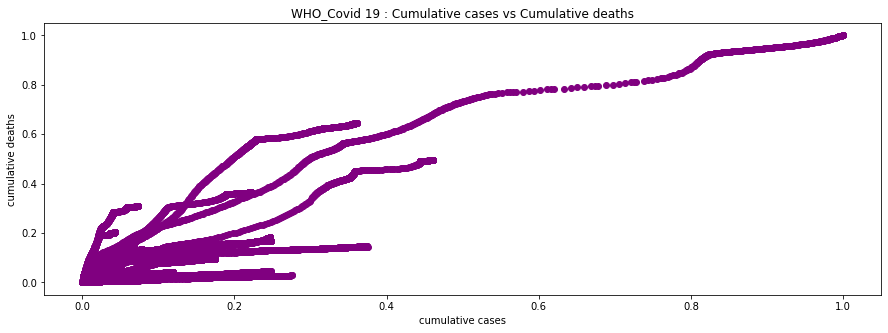

In [26]:
# Cumulative cases vs Cumulative deaths
plt.figure(figsize=(15,5))
plt.xlabel('cumulative cases')
plt.ylabel('cumulative deaths')
plt.title('WHO_Covid 19 : Cumulative cases vs Cumulative deaths')
plt.scatter(x = df['new_cumulative_cases'], y=df['new_cumulative_deaths'], color='purple');

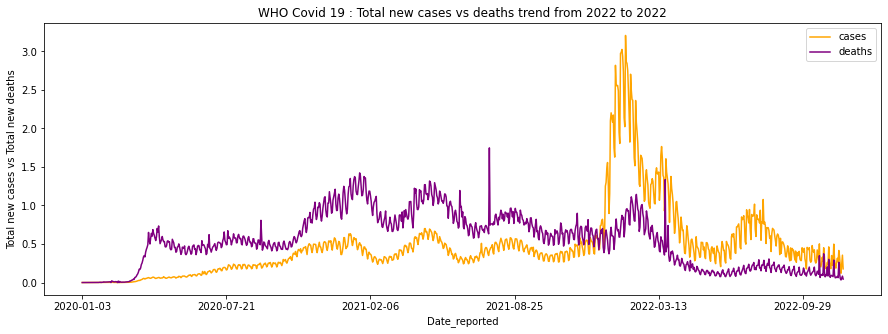

In [27]:
plt.ylabel('Total new cases vs Total new deaths')
plt.title('WHO Covid 19 : Total new cases vs deaths trend from 2022 to 2022')
df.groupby('Date_reported')['cases'].sum().plot(figsize=(15,5), color='orange', )
df.groupby('Date_reported')['deaths'].sum().plot(figsize=(15,5), color='purple')
plt.legend();

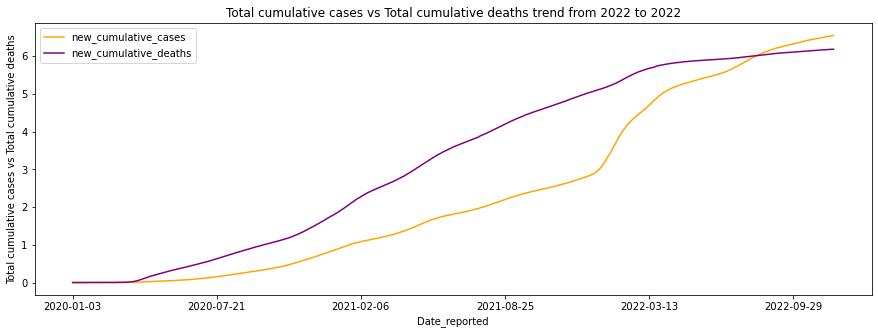

In [28]:
plt.ylabel('Total cumulative cases vs Total cumulative deaths')
plt.title('Total cumulative cases vs Total cumulative deaths trend from 2022 to 2022')
df.groupby('Date_reported')['new_cumulative_cases'].sum().plot(figsize=(15,5), color='orange', )
df.groupby('Date_reported')['new_cumulative_deaths'].sum().plot(figsize=(15,5), color='purple')
plt.legend();

In [29]:
top_5_countries_with_highest_cases = df.groupby('Country')['cases'].sum().sort_values(ascending=False)[0:5]
top_5_countries_with_highest_cases

Country
United States of America    76.672439
India                       35.299316
France                      28.777979
Germany                     28.698449
Brazil                      27.698731
Name: cases, dtype: float64

In [30]:
# The countries
top_5_countries_with_highest_cases.index

Index(['United States of America', 'India', 'France', 'Germany', 'Brazil'], dtype='object', name='Country')

In [31]:
# The values respectively
top_5_countries_with_highest_cases.values

array([76.672439  , 35.29931649, 28.77797901, 28.69844886, 27.69873096])

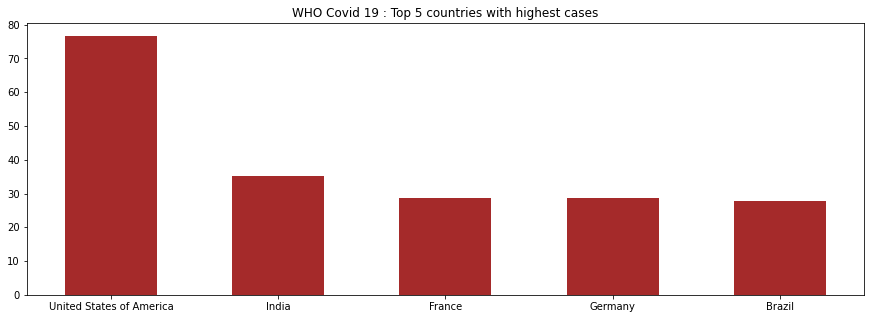

In [32]:
plt.figure(figsize= (15,5))
plt.bar(top_5_countries_with_highest_cases.index, top_5_countries_with_highest_cases.values, 0.55, color='brown')
plt.title('WHO Covid 19 : Top 5 countries with highest cases');

In [33]:
# creating a dataframe 'df1' to store information with the top 5 countries only
df1 = pd.DataFrame()
df1

print(" ")

for i in top_5_countries_with_highest_cases.index:
    print(i)
    df1 = df1.append(df[df['Country'] == i])
    
print(df1['Country'].unique())
print(" ")
df.sample(4)    

 
United States of America
India
France
Germany
Brazil
['United States of America' 'India' 'France' 'Germany' 'Brazil']
 


,Date_reported,Country_code,Country,WHO_region,cases,deaths,new_cumulative_cases,new_cumulative_deaths
123237,2021-09-19,LB,Lebanon,EMRO,0.000495,0.000349,0.006357,0.007707
44589,2020-07-16,CN,China,WPRO,0.000016,0.000175,0.000883,0.004358
27925,2021-03-21,BA,Bosnia and Herzegovina,EURO,0.001120,0.003844,0.001574,0.005451
159821,2020-08-04,NG,Nigeria,AFRO,0.000228,0.000699,0.000455,0.000840


In [34]:
# Creating lists to store information respectively about the columns of the top 5 countries
cases = df1.groupby('Country')['cases'].sum().values
country = df1.groupby('Country')['Country'].sum().index
deaths = df1.groupby('Country')['deaths'].sum().values
cumulative_cases = df1.groupby('Country')['new_cumulative_cases'].sum().values
cumulative_deaths = df1.groupby('Country')['new_cumulative_deaths'].sum().values


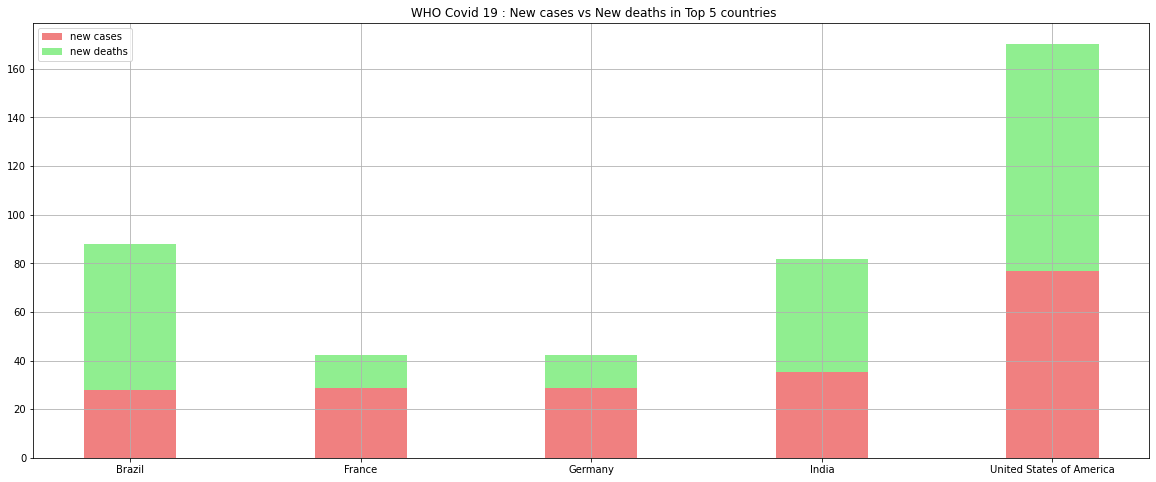

In [35]:
plt.figure(figsize=(20,8))
plt.title(' WHO Covid 19 : New cases vs New deaths in Top 5 countries')
plt.bar(country, cases, 0.4, label='new cases', color = 'lightcoral')
plt.bar(country, deaths,0.4, label='new deaths', bottom=cases, color = 'lightgreen')

plt.legend()
plt.grid();

#### Seeing the top 5 Countries in 2022, 2021 and then 2020 separately

In [36]:
year_2020 = df[df['Date_reported'].str.contains('2020')]
year_2021 = df[df['Date_reported'].str.contains('2021')]
year_2022 = df[df['Date_reported'].str.contains('2022')]

In [37]:
cases_in_countries_2022 = year_2022.groupby('Country')['cases'].sum().sort_values(ascending=False)

In [38]:
cases_in_countries_2022[0:5]

Country
United States of America    34.370234
Germany                     23.035585
France                      21.284947
Republic of Korea           20.666056
Japan                       17.649252
Name: cases, dtype: float64

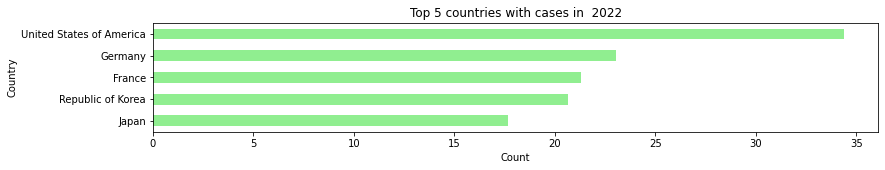

In [39]:
plt.figure(figsize=(13,2))
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 5 countries with cases in  2022")
cases_in_countries_2022.head().sort_values(ascending=True).plot(kind='barh', color='lightgreen');

In [40]:
cases_in_countries_2021 = year_2021.groupby('Country')['cases'].sum().sort_values(ascending=False)
cases_in_countries_2021[0:5]

Country
United States of America    26.832212
India                       19.416627
Brazil                      11.616908
The United Kingdom           8.595648
Russian Federation           5.800529
Name: cases, dtype: float64

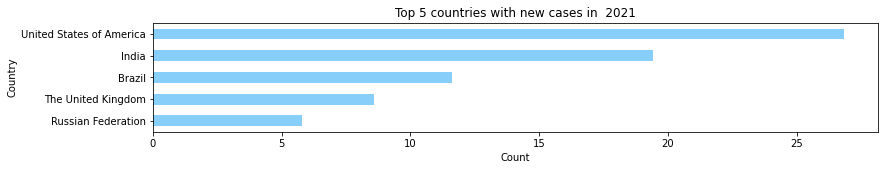

In [41]:
plt.figure(figsize=(13,2))
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 5 countries with new cases in  2021")
cases_in_countries_2021.head().sort_values(ascending=True).plot(kind='barh', color='lightskyblue');

In [42]:
cases_in_countries_2020 = year_2020.groupby('Country')['cases'].sum().sort_values(ascending=False)
cases_in_countries_2020[0:5]

Country
United States of America    15.469993
India                        8.112621
Brazil                       5.976635
Russian Federation           2.496442
France                       2.026813
Name: cases, dtype: float64

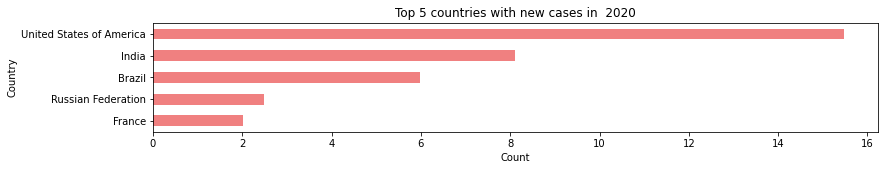

In [43]:
plt.figure(figsize=(13,2))
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 5 countries with new cases in  2020")
cases_in_countries_2020.head().sort_values(ascending=True).plot(kind='barh', color='lightcoral');

#### Identifying WHO Regions

In [44]:
print( 'WHO defined regions are: ', df['WHO_region'].unique())

WHO defined regions are:  ['EMRO' 'EURO' 'AFRO' 'WPRO' 'AMRO' 'SEARO' 'Other']


In [45]:
# Seeing WHO Region new cases occurence
df.groupby('WHO_region')['cases'].sum().sort_values(ascending=True)

WHO_region
Other      0.000604
AFRO       7.422102
EMRO      18.322764
SEARO     47.903242
WPRO      77.099499
AMRO     143.357941
EURO     208.549423
Name: cases, dtype: float64

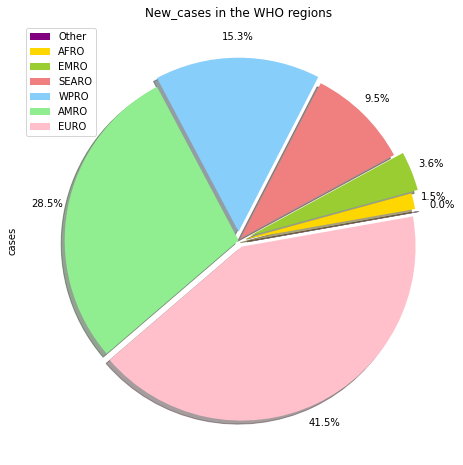

In [46]:
# Plotting a piechart to show how the cases against WHO regions

WHO_region_new_cases_grouped = df.groupby('WHO_region')['cases'].sum().sort_values(ascending=True)

plt.title('New_cases in the WHO regions')
WHO_region_new_cases_grouped.plot(
    kind = 'pie',
    figsize = (8,8), 
    autopct='%1.1f%%', 
    startangle=10,
    shadow=True,
    labels=None,
    pctdistance=1.12, 
    colors= ['purple', 'gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightgreen', 'pink'],
    explode = [0.07,0.03,0.07,0.02,0.05,0,0.04]
    
# explode to ratio for each continent with which to offset each wedge.


)

# add legend
plt.legend(labels=WHO_region_new_cases_grouped.index, loc='upper left', );


In [47]:
# Seeing Top Country with cases in Africa
df[df['WHO_region'] == 'AFRO'].groupby('Country')['cases'].sum().sort_values(ascending=False)[0:10]

Country
South Africa    3.190879
Ethiopia        0.390601
Réunion         0.378840
Kenya           0.269488
Zambia          0.263674
Botswana        0.257858
Mauritius       0.214826
Algeria         0.214163
Nigeria         0.210414
Zimbabwe        0.203784
Name: cases, dtype: float64

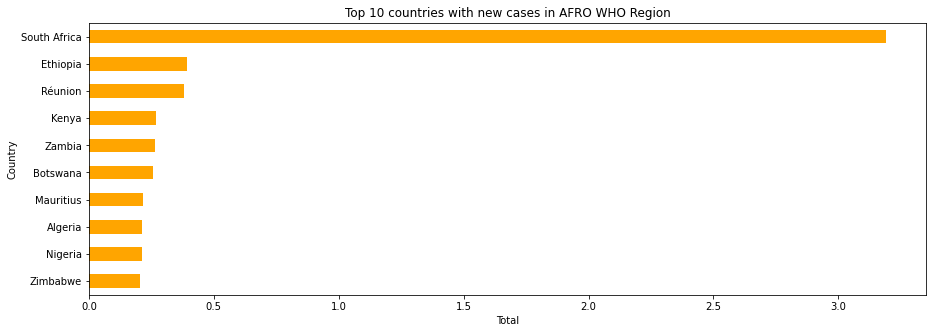

In [48]:
# Plotting to show the Top countries in Africa with cases
AFRO_WHO_region_new_cases = df[df['WHO_region'] == 'AFRO'].groupby('Country')['cases'].sum().sort_values(ascending=False)[0:10]

plt.figure(figsize=(15,5))
plt.xlabel("Total")
plt.ylabel("Country")
plt.title("Top 10 countries with new cases in AFRO WHO Region")
AFRO_WHO_region_new_cases.sort_values(ascending=True).plot(kind = 'barh', color='orange');

#### Conclusion

* The country that was affected the most with Covid 19 is United States of America, followed by India
* The region that was affected the most was EURO
* The country in AFRO region that was affected the most was South Africa
* Most deaths happened in 2021 probably because the virus was still new
* More cases were noted in 2022 after cases dropped in 2021 probably because of the second wave